##### Load Data and Initial Exploration

In [10]:
import pandas as pd

# 1. Load the dataset into a pandas DataFrame
df = pd.read_csv(r'C:\Users\admin\Downloads\diabetes.csv')
print("Dataset loaded successfully.")

# 2. Display the first 5 rows of the DataFrame
print("\nFirst 5 rows of the DataFrame:")
print(df.head())

# 3. Display the column names and their respective data types
print("\nDataFrame Info:")
df.info()

# 4. Generate descriptive statistics for the numerical columns
print("\nDescriptive statistics for numerical columns:")
print(df.describe())

# 5. Check for the number of unique values in each column
print("\nNumber of unique values in each column:")
print(df.nunique())
df

Dataset loaded successfully.

First 5 rows of the DataFrame:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregna

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
#### Exploratory Data Analysis (EDA)

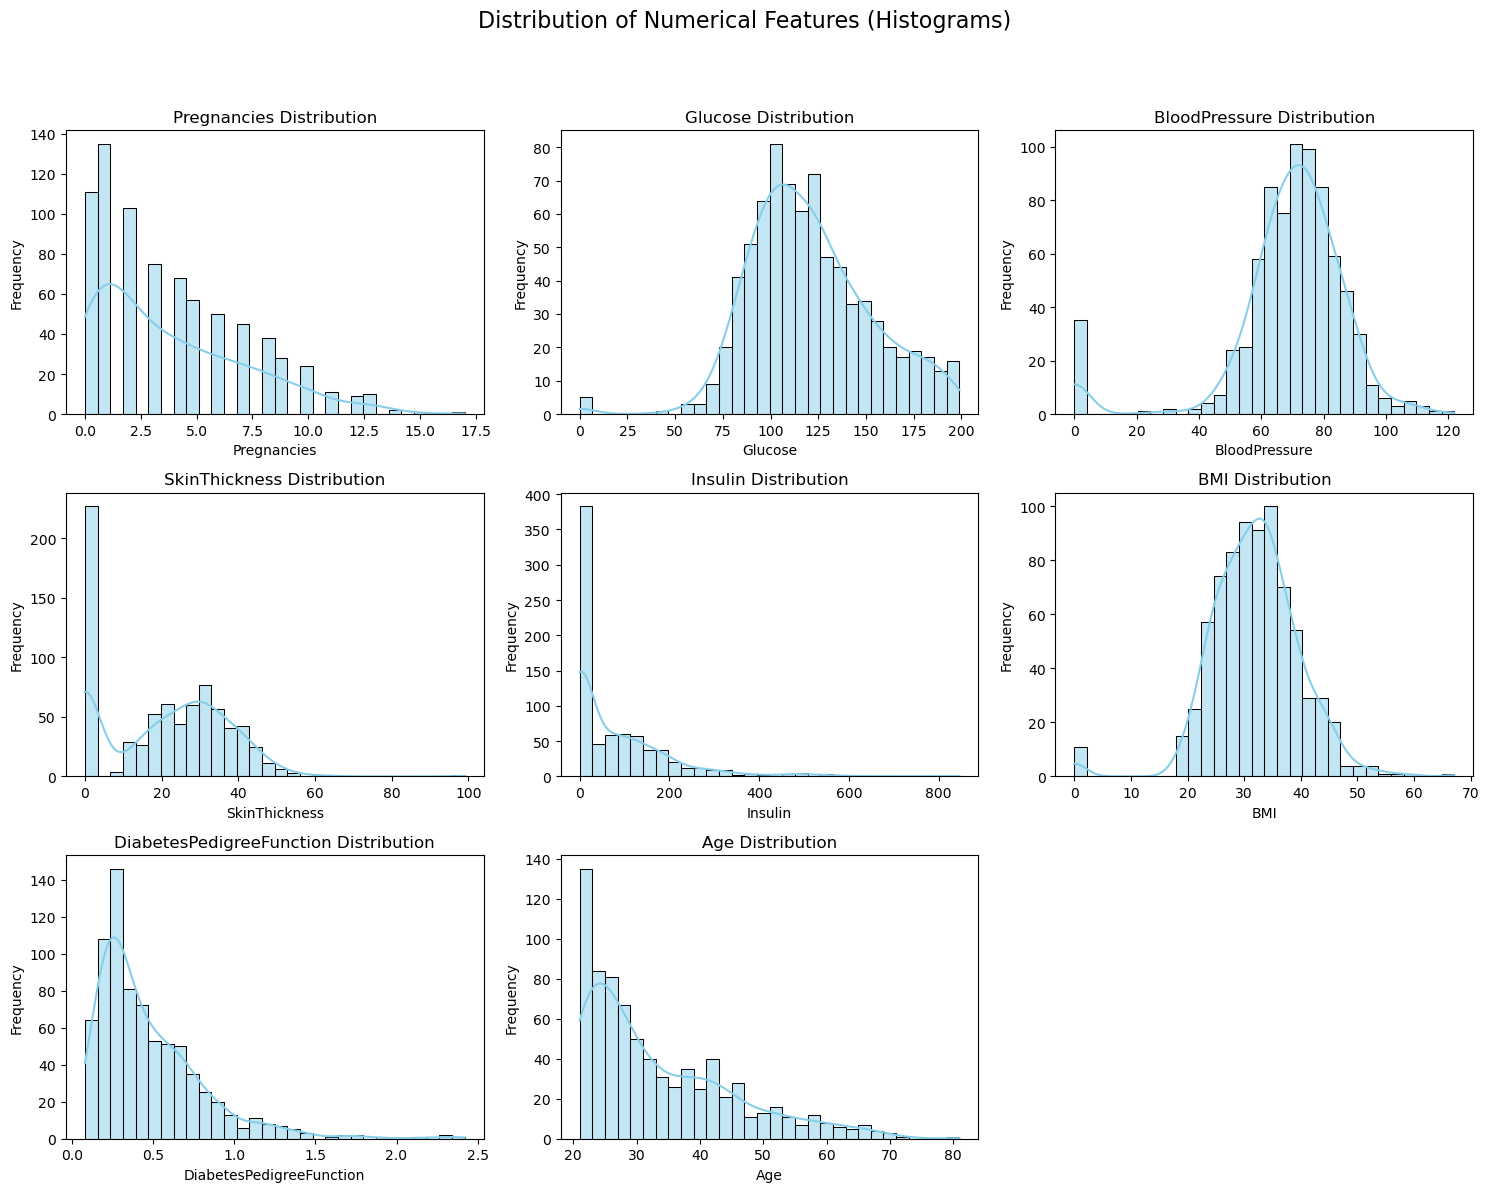

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Identify numerical features, excluding 'Outcome'
numerical_features = df.columns.drop('Outcome')

# Set up the matplotlib figure and axes for histograms
num_features = len(numerical_features)
num_cols = 3 # Number of columns for the histogram grid
num_rows = (num_features + num_cols - 1) // num_cols # Calculate number of rows needed

plt.figure(figsize=(num_cols * 5, num_rows * 4))
plt.suptitle('Distribution of Numerical Features (Histograms)', y=1.02, fontsize=16)

for i, feature in enumerate(numerical_features):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.histplot(df[feature], kde=True, color='skyblue', bins=30)
    plt.title(f'{feature} Distribution')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout(rect=[0, 0.03, 1, 0.98]) # Adjust layout to prevent suptitle overlap
plt.show()


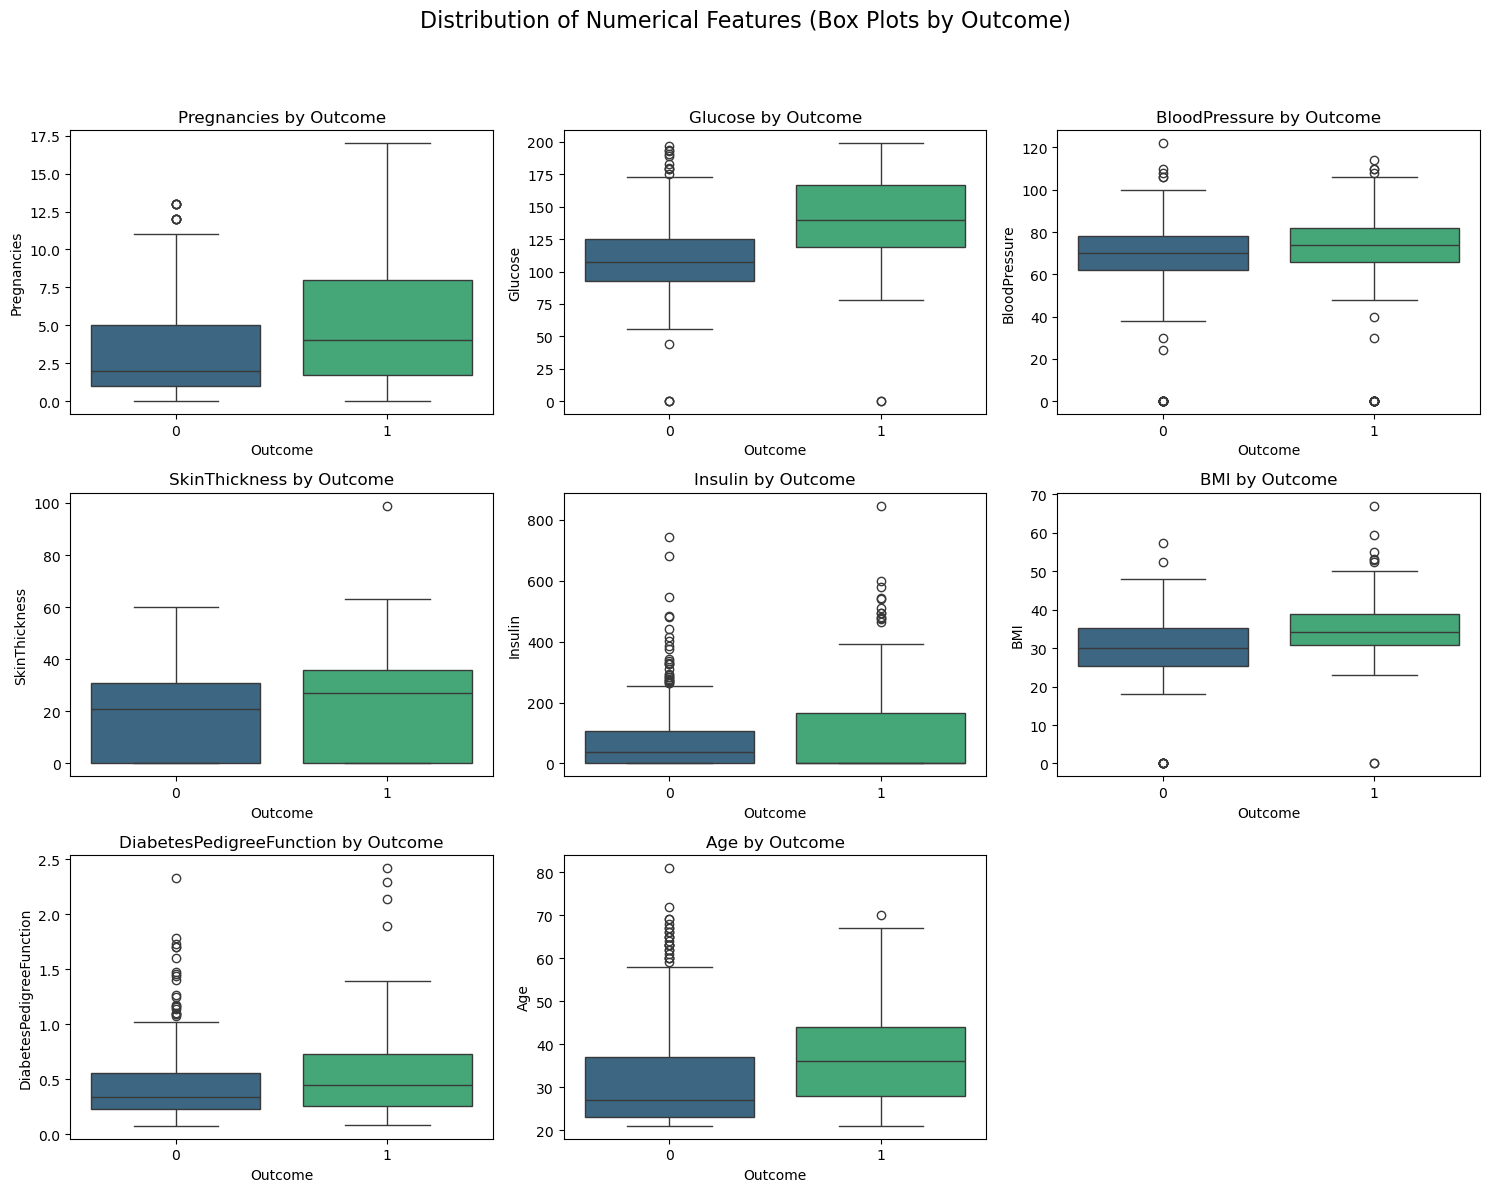

In [16]:
num_cols_box = 3
num_rows_box = (num_features + num_cols_box - 1) // num_cols_box

plt.figure(figsize=(num_cols_box * 5, num_rows_box * 4))
plt.suptitle('Distribution of Numerical Features (Box Plots by Outcome)', y=1.02, fontsize=16)

for i, feature in enumerate(numerical_features):
    plt.subplot(num_rows_box, num_cols_box, i + 1)
    sns.boxplot(x='Outcome', y=feature, data=df, hue='Outcome',palette='viridis',legend=False)
    plt.title(f'{feature} by Outcome')
    plt.xlabel('Outcome')
    plt.ylabel(feature)

plt.tight_layout(rect=[0, 0.03, 1, 0.98]) # Adjust layout to prevent suptitle overlap
plt.show()

#### Correlation Matrix and Heatmap

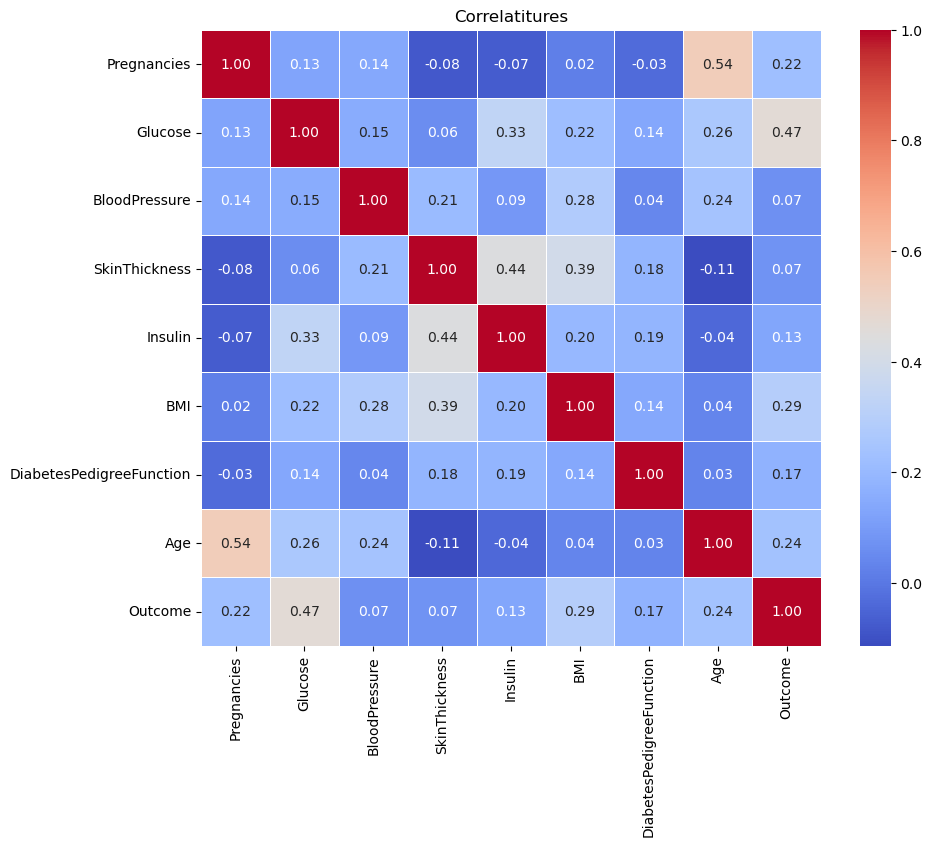

In [12]:
plt.figure(figsize = ( 10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlatitures')
plt.show()

#### Pair Plot for Relationships

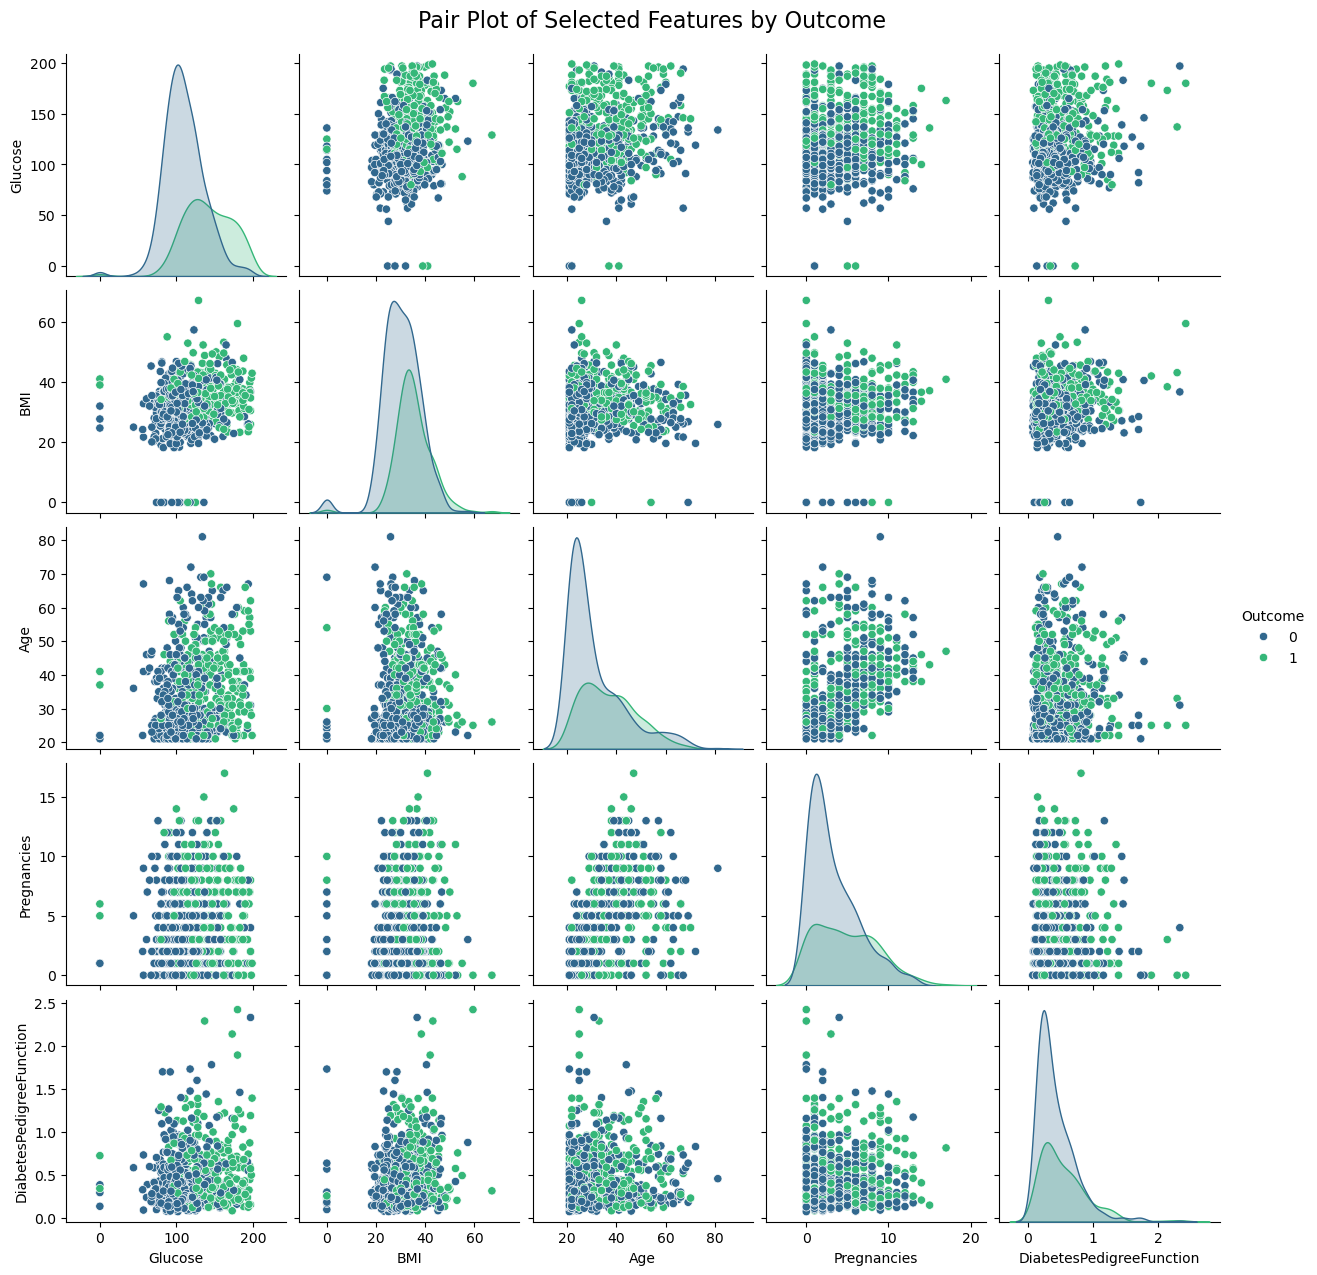

In [11]:
selected_features = ['Glucose', 'BMI', 'Age', 'Pregnancies', 'DiabetesPedigreeFunction', 'Outcome']
sns.pairplot(df[selected_features], hue='Outcome', palette='viridis', diag_kind='kde')
plt.suptitle('Pair Plot of Selected Features by Outcome', y=1.02, fontsize=16)
plt.show()

#### Data Preprocessing

In [12]:
columns_to_replace_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for column in columns_to_replace_zeros:
    # Calculate the median of non-zero values in the column
    median_val = df[df[column] != 0][column].median()
    
    # Replace zero values with the calculated median
    df[column] = df[column].replace(0, median_val)

print("Minimum values after replacing zeros with median:")
for column in columns_to_replace_zeros:
    print(f"{column}: {df[column].min()}")

Minimum values after replacing zeros with median:
Glucose: 44
BloodPressure: 24
SkinThickness: 7
Insulin: 14
BMI: 18.2


In [13]:
from sklearn.model_selection import train_test_split

# Separate features (X) from the target variable (y)
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (614, 8)
Shape of X_test: (154, 8)
Shape of y_train: (614,)
Shape of y_test: (154,)


In [28]:
#### Build Logistic Regression Model
from sklearn.linear_model import LogisticRegression
from joblib import dump

# Instantiate the LogisticRegression model
model = LogisticRegression(solver='liblinear', random_state=42)

# Train the model using the training data
model.fit(X_train, y_train)

# Save the trained model for later deployment
dump(model, 'logistic_regression_model.joblib')

print("Logistic Regression model trained and saved successfully!")

Logistic Regression model trained and saved successfully!


Model Performance on Test Data:
Accuracy:  0.7792
Precision: 0.7333
Recall:    0.6000
F1-Score:  0.6600
ROC-AUC:   0.8152


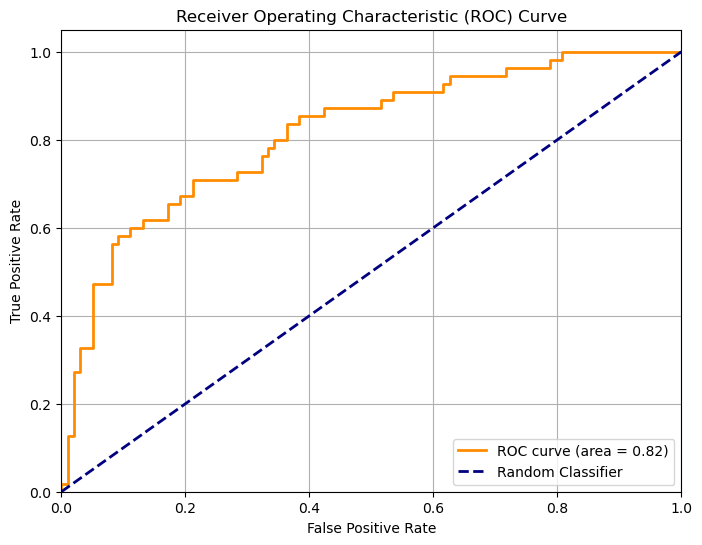

In [30]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt

# 1. Use the trained model to make predictions on the X_test data
y_pred = model.predict(X_test)

# 2. Calculate the predicted probabilities for the positive class (class 1)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# 3. Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# 4. Print all calculated metrics
print(f"Model Performance on Test Data:")
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-Score:  {f1:.4f}")
print(f"ROC-AUC:   {roc_auc:.4f}")

# 5. Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc_curve = auc(fpr, tpr)

# 6. Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_curve:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


#### Interpret Model Coefficients

In [19]:
import pandas as pd

# 1. Retrieve Coefficients and Intercept
coefficients = model.coef_[0]
intercept = model.intercept_[0]

# 2. Map Coefficients to Features
feature_names = X.columns
coef_series = pd.Series(coefficients, index=feature_names)

# 3. Display Intercept
print(f"Model Intercept: {intercept:.4f}")

# 4. Display Sorted Coefficients by absolute value
print("\nModel Coefficients (sorted by absolute value):\n")
print(coef_series.abs().sort_values(ascending=False))

print("\nFull Coefficients:\n")
print(coef_series.sort_values(ascending=False))

Model Intercept: -5.5485

Model Coefficients (sorted by absolute value):

DiabetesPedigreeFunction    0.398900
Pregnancies                 0.070930
BMI                         0.070603
BloodPressure               0.030209
Glucose                     0.029184
Age                         0.025999
Insulin                     0.001105
SkinThickness               0.000316
dtype: float64

Full Coefficients:

DiabetesPedigreeFunction    0.398900
Pregnancies                 0.070930
BMI                         0.070603
Glucose                     0.029184
Age                         0.025999
SkinThickness               0.000316
Insulin                    -0.001105
BloodPressure              -0.030209
dtype: float64
